## ARIMA pre-processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace import sarimax
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

## Read file and return a pd.Series()

In [ ]:
# test
stocks = "GOOG"

# Extracting daily data from yahoo finance, 2015-01-01 to 2020-03-01
df = yf.download(tickers=stocks, interval="1mo")

df.drop("Volume", axis=1, inplace=True)
df["Price"] = df.mean(axis=1)
data = pd.Series(df["Price"])
data = data.dropna()

<AxesSubplot:title={'center':'Google stocks'}, xlabel='Date'>

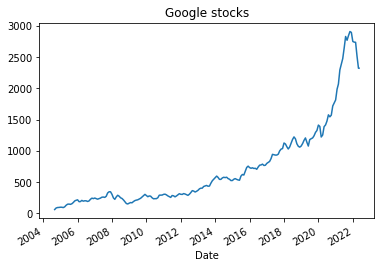

In [75]:
data.plot(title="Google stocks")

<AxesSubplot:xlabel='Date'>

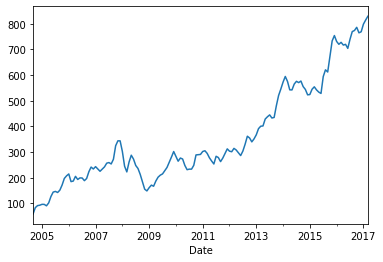

In [9]:
start_amount = 0
train_amount = 150
test_amount = 3
test_amount2 = 12

all = data.iloc[start_amount:train_amount+test_amount]
train = data.iloc[start_amount:train_amount+1]
test = data.iloc[train_amount:train_amount+test_amount]
test2 = data.iloc[train_amount:train_amount+test_amount2]
train.plot()

## Do a augmented Dickey-Fuller test

(0.7637825570907023,
 0.991028476271399,
 2,
 148,
 {'1%': -3.4753253063120644,
  '5%': -2.881274703275226,
  '10%': -2.5772928360116873},
 1176.3122774277313)

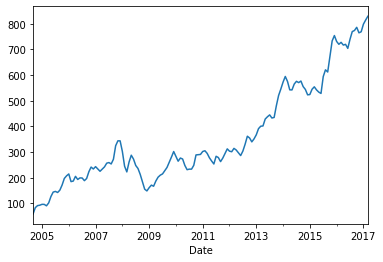

In [10]:
train.plot()
resAd = adfuller(train)
resAd

## And one with a one-lag differences dataset

(-9.39505593817009,
 6.407468658903996e-16,
 1,
 148,
 {'1%': -3.4753253063120644,
  '5%': -2.881274703275226,
  '10%': -2.5772928360116873},
 1167.891451682227)

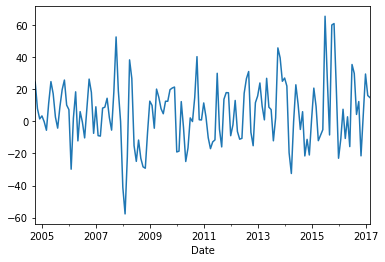

In [11]:
diffTrain = train-train.shift(1)
diffTrain = diffTrain.dropna()
diffTrain.plot()
adfuller(diffTrain)

## Plot PACF using the differenced to determine AR

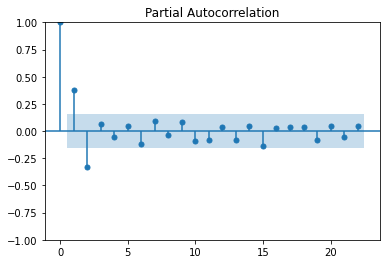

In [12]:
plot_pacf(diffTrain, method="ywm");

## Plot ACF using the differenced to determine MA

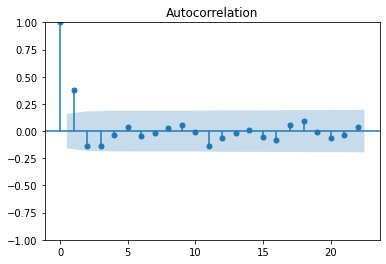

In [13]:
plot_acf(diffTrain);

In [82]:
smodel = sm.tsa.statespace.SARIMAX(train, trend='ct', order=(3,1,2))
smodel = smodel.fit(maxiter=300)
smodel.summary()

c:\Users\magnu\AppData\Local\Programs\Python\Python39-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\magnu\AppData\Local\Programs\Python\Python39-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\magnu\AppData\Local\Programs\Python\Python39-32\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\magnu\AppData\Local\Programs\Python\Python39-32\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starti

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  151
Model:               SARIMAX(3, 1, 2)   Log Likelihood                -637.373
Date:                Sun, 15 May 2022   AIC                           1290.746
Time:                        16:16:32   BIC                           1314.831
Sample:                    09-01-2004   HQIC                          1300.531
                         - 03-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.8817      4.408      0.427      0.669      -6.758      10.522
drift          0.0485      0.068      0.715      0.475      -0.084       0.181
ar.L1          0.0350      0.851      0.041      0.967      -1.634       1.704
ar.L2          0.0356      0.219      0.162      0.871      -0.394       0.465
ar.L3         -0.1534      0.177     -0.866      0.386      -0.500       0.194
ma.L1          0.5075      0.859      0.591      0.555      -1.176       2.191
ma.L2         -0.1811      0.462     -0.392      0.695      -1.087       0.725
sigma2       286.3562     30.299      9.451      0.000     226.971     345.741
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                11.81
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.49   Skew:                             0.36
Prob(H) (two-sided):                  0.16   Kurtosis:                         4.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0, 0.5, 'Stock Price')

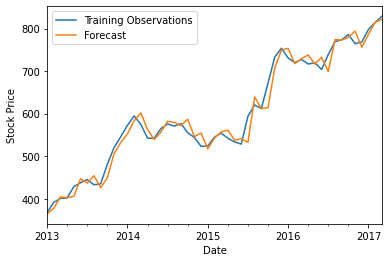

In [83]:
view = 100
train.iloc[view:].plot()
smodel.predict(start=view, end=train_amount-start_amount).plot()
plt.legend(["Training Observations", "Forecast"])
plt.ylabel("Stock Price")

Text(0, 0.5, 'Stock Price')

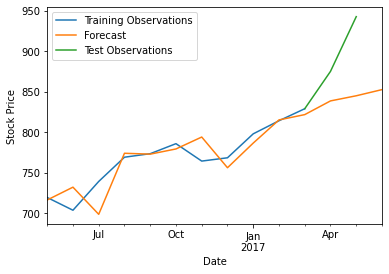

In [84]:
view = 140
train.iloc[view:].plot()
smodel.predict(start=view, end=train_amount-start_amount+test_amount).plot()
test.plot()
plt.legend(["Training Observations", "Forecast", "Test Observations"])
plt.ylabel("Stock Price")

Text(0, 0.5, 'Stock Price')

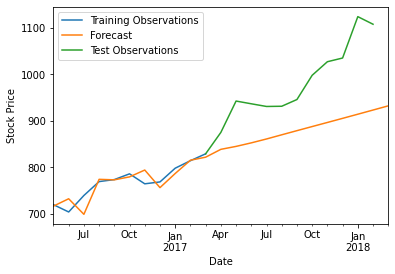

In [85]:
view = 140
train.iloc[view:].plot()
smodel.predict(start=view, end=train_amount-start_amount+test_amount2).plot()
test2.plot()
plt.legend(["Training Observations", "Forecast", "Test Observations"])
plt.ylabel("Stock Price")

## Prediction every 2 months

c:\Users\magnu\AppData\Local\Programs\Python\Python39-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\magnu\AppData\Local\Programs\Python\Python39-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\magnu\AppData\Local\Programs\Python\Python39-32\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\magnu\AppData\Local\Programs\Python\Python39-32\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starti

Text(0, 0.5, 'Stock Price')

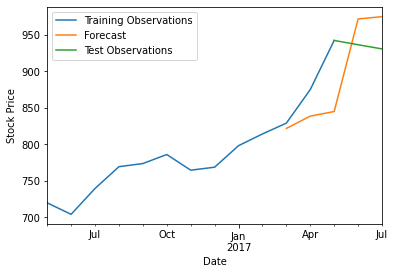

In [81]:
# Forecast 1 
new_train = train.copy(deep=True)
new_test = data.iloc[train_amount:train_amount+3]

smodel = sm.tsa.statespace.SARIMAX(new_train, trend='ct', order=(3,1,2))
smodel = smodel.fit(maxiter=300)
predicts = smodel.predict(start=view, end=train_amount-start_amount+2).iloc[-3:]
first_predict = smodel.predict(start=view, end=train_amount-start_amount+2).iloc[-3:]

# Forecast 2
new_train = new_train.append(new_test.iloc[1:])
new_test = data.iloc[train_amount+2:train_amount+5]

smodel = sm.tsa.statespace.SARIMAX(new_train, trend='ct', order=(3,1,2))
smodel = smodel.fit(maxiter=300)

second_predict = smodel.predict(start=view, end=train_amount-start_amount+4).iloc[-2:]
predicts = predicts.append(second_predict)


# Forecast 3
new_train = new_train.append(new_test.iloc[3:])
new_test = data.iloc[train_amount+4:train_amount+7]

smodel = sm.tsa.statespace.SARIMAX(new_train, trend='ct', order=(3,1,2))
smodel = smodel.fit(maxiter=300)

third_predict = smodel.predict(start=view, end=train_amount-start_amount+6).iloc[-2:]
predicts = predicts.append(third_predict)

new_train.iloc[view:].plot()
predicts.plot()
new_test.plot()
plt.legend(["Training Observations", "Forecast", "Test Observations"])
plt.ylabel("Stock Price")